<a href="https://colab.research.google.com/github/Shiveringapple/DeepLearing/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

答案: deer


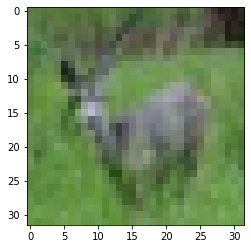

In [ ]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, x_train.shape[0])
print("答案:", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:
# 過度依賴某特徵也是一種過擬和，如果過度依賴的特徵被遮住就爆炸了，應付突發狀況 -> Dropout：每次訓練隨機丟棄一些神經元(建議25~50%)，測驗的數量跟剩下的訓練相同

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
layers = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [ ]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [ ]:
# batch:看幾筆在調整一次(20-200)
# epochs:整份訓練資料看幾遍 (10->60000*10)
# verbose: 0(quiet) 1(default) 2(我喜歡的)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     validation_split=0.1,
     batch_size=200,
     epochs=100,
     verbose=2,
     callbacks=callbacks)

Epoch 1/100
225/225 - 3s - loss: 1.6017 - accuracy: 0.4153 - val_loss: 1.2748 - val_accuracy: 0.5356
Epoch 2/100
225/225 - 3s - loss: 1.1779 - accuracy: 0.5808 - val_loss: 1.0555 - val_accuracy: 0.6282
Epoch 3/100
225/225 - 3s - loss: 0.9744 - accuracy: 0.6598 - val_loss: 0.8864 - val_accuracy: 0.6940
Epoch 4/100
225/225 - 3s - loss: 0.8384 - accuracy: 0.7073 - val_loss: 0.8215 - val_accuracy: 0.7192
Epoch 5/100
225/225 - 3s - loss: 0.7407 - accuracy: 0.7427 - val_loss: 0.7547 - val_accuracy: 0.7364
Epoch 6/100
225/225 - 3s - loss: 0.6603 - accuracy: 0.7681 - val_loss: 0.7206 - val_accuracy: 0.7490
Epoch 7/100
225/225 - 3s - loss: 0.5742 - accuracy: 0.7972 - val_loss: 0.7109 - val_accuracy: 0.7586
Epoch 8/100
225/225 - 3s - loss: 0.5026 - accuracy: 0.8246 - val_loss: 0.6705 - val_accuracy: 0.7730
Epoch 9/100
225/225 - 3s - loss: 0.4474 - accuracy: 0.8428 - val_loss: 0.7352 - val_accuracy: 0.7566
Epoch 10/100
225/225 - 3s - loss: 0.3896 - accuracy: 0.8625 - val_loss: 0.6918 - val_accura

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7065 - accuracy: 0.7646


[0.7064797878265381, 0.7645999789237976]

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)
mat = confusion_matrix(y_test_reshape, pre)
pd.DataFrame(mat, 
       columns=["{}(預測)".format(trans[i]) for i in range(10)],
       index=["{}(真實)".format(trans[i]) for i in range(10)])

(10000,)
(10000, 1)
(10000,)


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),862,12,33,8,15,3,11,8,34,14
automobile(真實),25,886,3,4,3,4,8,6,25,36
bird(真實),87,6,624,47,93,58,47,27,9,2
cat(真實),42,10,59,545,63,160,59,37,15,10
deer(真實),24,3,53,34,748,32,41,56,7,2
dog(真實),24,5,37,140,44,682,15,45,7,1
frog(真實),9,7,29,36,30,19,852,7,7,4
horse(真實),13,3,32,22,62,43,7,812,2,4
ship(真實),73,27,16,6,4,4,2,1,857,10
truck(真實),46,95,12,8,6,13,9,12,21,778


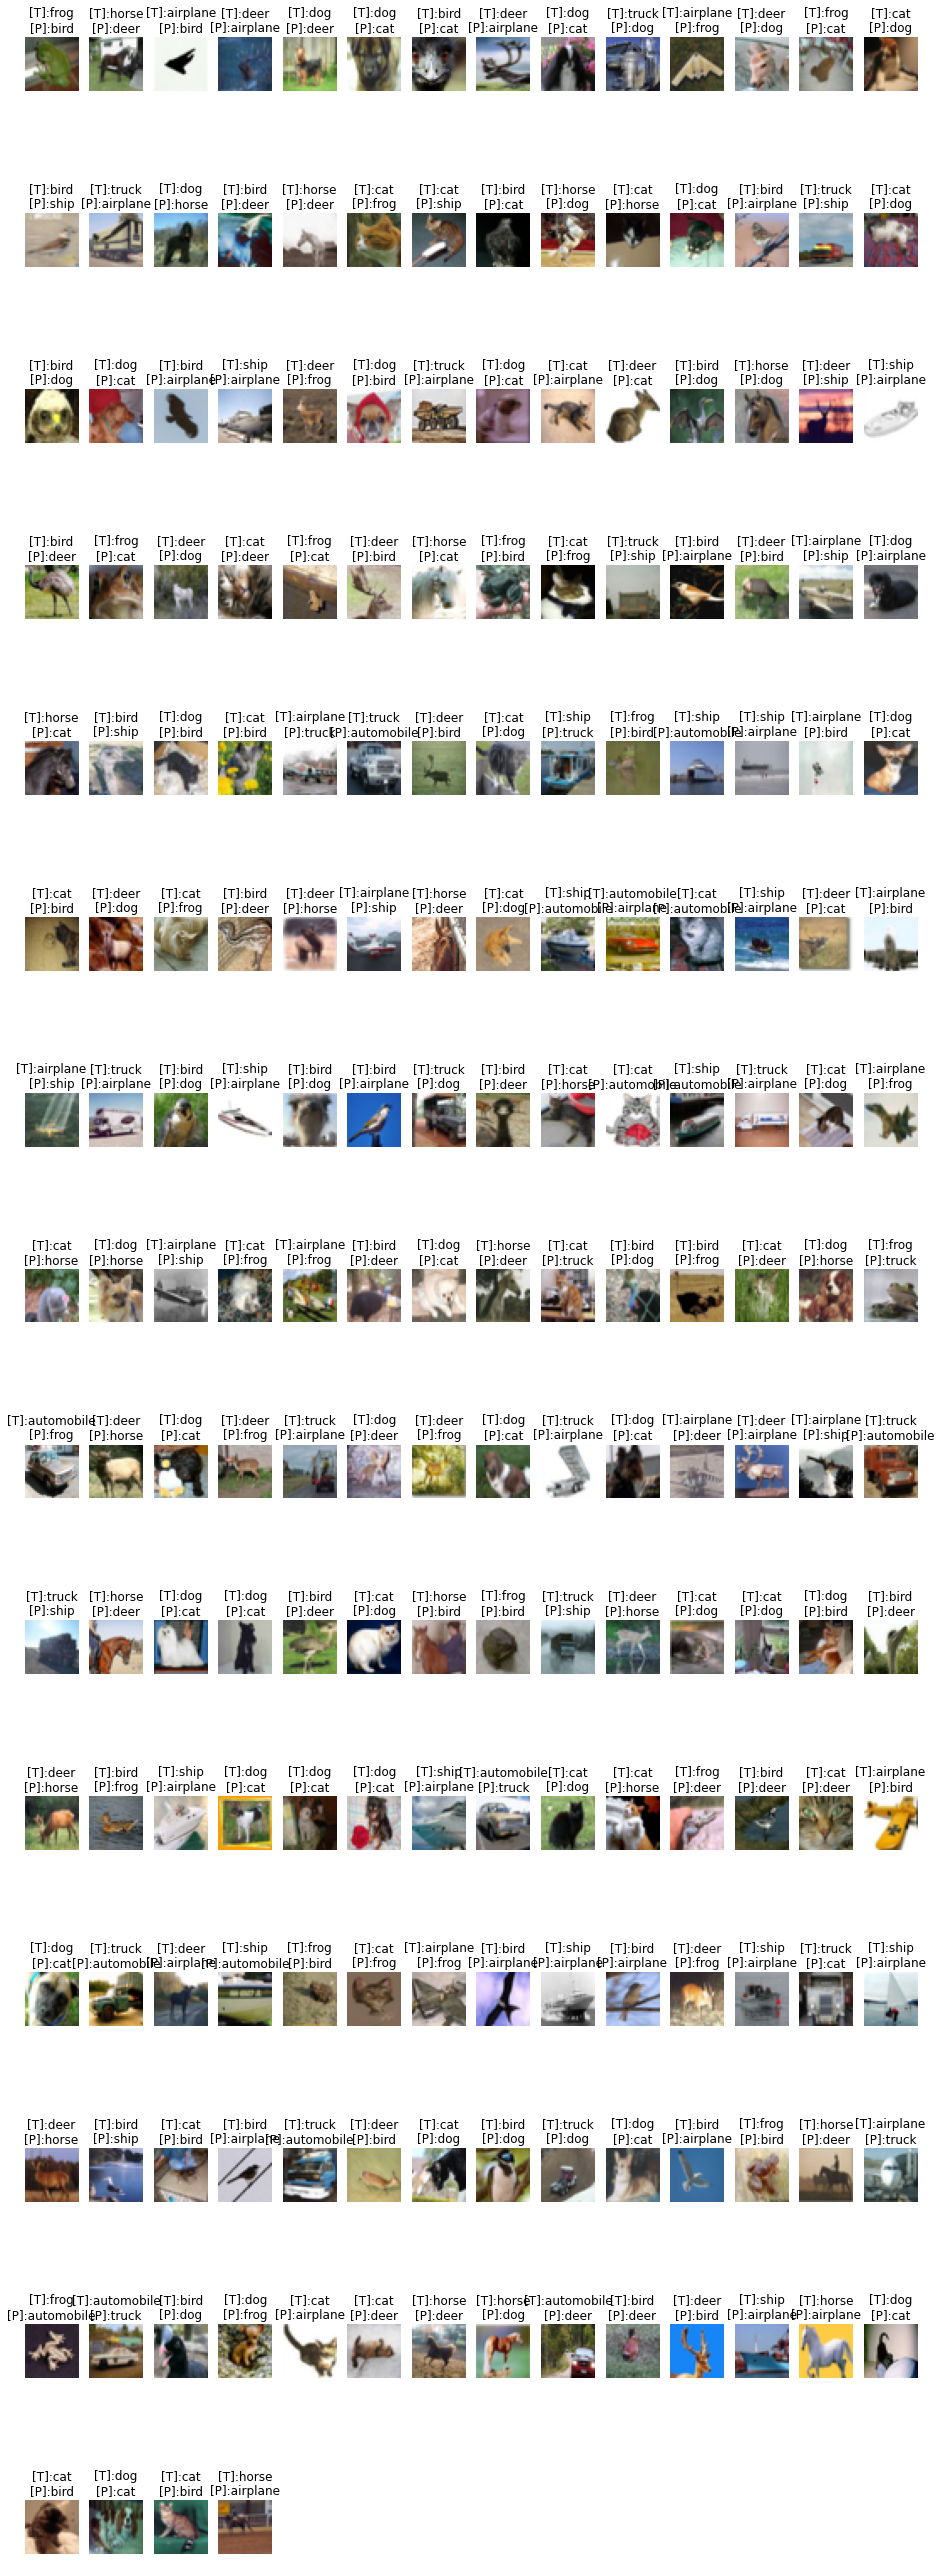

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
img, label, pred = x_test[idx], y_test_reshape[idx], pre[idx]

plt.figure(figsize=(16, 48))
width = 14
height = len(img) // width + 1
for i in range(len(img)):
    plt.subplot(height, width, i+1)
    t = "[T]:{}\n[P]:{}".format(trans[label[i]], trans[pred[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img[i])